<a href="https://colab.research.google.com/github/sudeepmathew/Voice-Of-Customer/blob/sudeepmathew-VOC_LDA/MG_Hecotor_Features_Analysis_From_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mounting drive
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# Importing Data

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_excel("/gdrive/My Drive/Mg_Hector_Feature_Analysis (1).xlsx")

In [0]:
data.head()

,Reviews,Category,Sentiment
0,"MG's Hector will be feature rich , base trims ...",Features,Positive
1,I like what i'm hearing. IMO MG is getting it ...,Features/Competitor,Neutral
2,"The wait for MG Motor's first SUV for India, t...",Features,Positive
3,I meant the direction that the needle moves. A...,Features,Neutral
4,These look nice ! Modded with 18-inch forged I...,Features,Positive


In [0]:
#Fetch wordcount for each abstract
data['word_count'] = data['Reviews'].apply(lambda x: len(str(x).split(" ")))
data[['Reviews','word_count']].head()

,Reviews,word_count
0,"MG's Hector will be feature rich , base trims ...",154
1,I like what i'm hearing. IMO MG is getting it ...,129
2,"The wait for MG Motor's first SUV for India, t...",136
3,I meant the direction that the needle moves. A...,101
4,These look nice ! Modded with 18-inch forged I...,28


# Most common and uncommon words

In [0]:
#Identify common words
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:20]
freq

the     903
I       367
to      336
and     336
a       254
in      242
of      227
is      208
on      148
have    138
for     135
with    125
that    122
it      116
you     112
was     107
be      105
my      102
this     86
as       81
dtype: int64

In [0]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data 
         ['Reviews']).split()).value_counts()[-20:]
freq1

forgot        1
China)        1
wagon         1
off,          1
night.        1
conditions    1
dont.         1
pricing,      1
Sales         1
Effective     1
Foreign       1
territory,    1
palm          1
magnum        1
referring     1
liters        1
bit.          1
you'd         1
department    1
investing     1
dtype: int64

In [53]:
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Stop Word Removal and adding Custom Stop Word

In [0]:
#Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large","update","asked","car","would", "also", "iv", "one", "two", "new", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http"]
stop_words = stop_words.union(new_words)

# Building Cleaned Corpus

In [0]:
corpus = []
for i in range(0,59):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [0]:
#View corpus item
print(corpus[30])

larger glass surface area easier break lesser force opening bigger usual sunroof window glass allow larger item taken easily possibly even without sounding alarm opening door sound alarm sure sun roof without seen dashcam rearcam installed ofcourse thief choice break windshield rear glass car expect something valuable stored


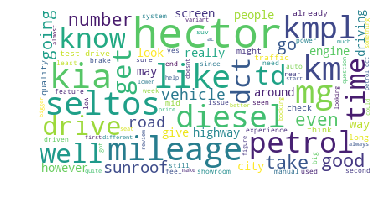

In [0]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=2000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [0]:
# Listing a Review in bag of Word
list(cv.vocabulary_.keys())[:10]


['mg',
 'hector',
 'feature',
 'rich',
 'expected',
 'airbags',
 'top',
 'spec',
 'variant',
 'inch']

# Visualize top N uni-grams, bi-grams & tri-grams

[Text(0, 0, 'hector'),
 Text(0, 0, 'kmpl'),
 Text(0, 0, 'mg'),
 Text(0, 0, 'drive'),
 Text(0, 0, 'kia'),
 Text(0, 0, 'dct'),
 Text(0, 0, 'petrol'),
 Text(0, 0, 'like'),
 Text(0, 0, 'km'),
 Text(0, 0, 'seltos'),
 Text(0, 0, 'mileage'),
 Text(0, 0, 'diesel'),
 Text(0, 0, 'know'),
 Text(0, 0, 'car'),
 Text(0, 0, 'well'),
 Text(0, 0, 'time'),
 Text(0, 0, 'get'),
 Text(0, 0, 'good'),
 Text(0, 0, 'sunroof'),
 Text(0, 0, 'take')]

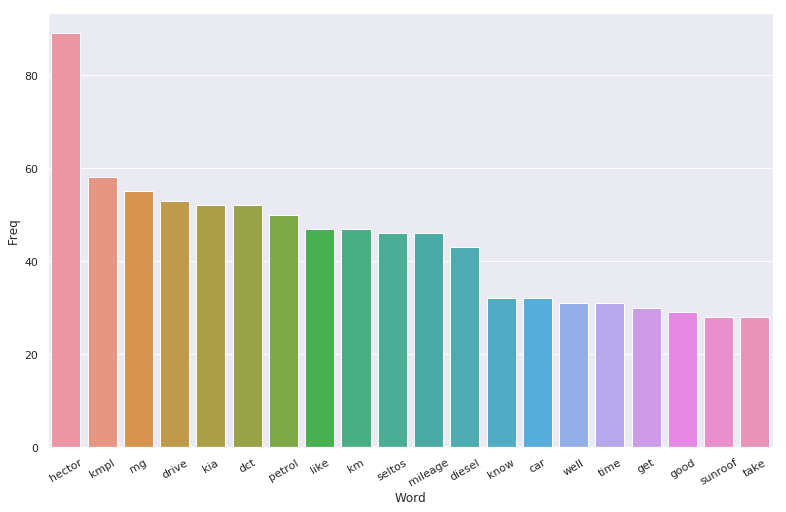

In [0]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0          test drive    19
1          petrol dct    13
2     fuel efficiency    10
3           mg hector     9
4       voice command     9
5         return kmpl     7
6          start kmpl     6
7            sun roof     6
8            auto cut     6
9   panoramic sunroof     5
10            top end     5
11         hector dct     5
12          dct sharp     5
13      seltos hector     5
14        much better     5
15          could see     5
16          rear seat     5
17         real world     5
18            dct gtx     5
19       peak traffic     5


[Text(0, 0, 'test drive'),
 Text(0, 0, 'petrol dct'),
 Text(0, 0, 'fuel efficiency'),
 Text(0, 0, 'mg hector'),
 Text(0, 0, 'voice command'),
 Text(0, 0, 'return kmpl'),
 Text(0, 0, 'start kmpl'),
 Text(0, 0, 'sun roof'),
 Text(0, 0, 'auto cut'),
 Text(0, 0, 'panoramic sunroof'),
 Text(0, 0, 'top end'),
 Text(0, 0, 'hector dct'),
 Text(0, 0, 'dct sharp'),
 Text(0, 0, 'seltos hector'),
 Text(0, 0, 'much better'),
 Text(0, 0, 'could see'),
 Text(0, 0, 'rear seat'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'dct gtx'),
 Text(0, 0, 'peak traffic')]

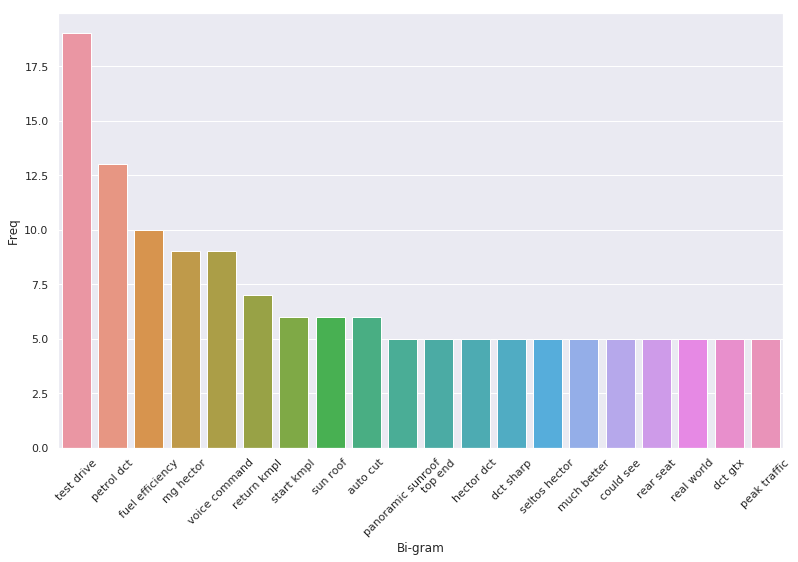

In [0]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                      Tri-gram  Freq
0             short test drive     5
1          hector clear choice     4
2            hector petrol dct     4
3              number mid kmpl     4
4            mid kmpl finished     4
5          kmpl finished drive     4
6            finished drive sa     4
7               drive sa reach     4
8                sa reach back     4
9          reach back showroom     4
10              didnt like way     3
11             like way hector     3
12              far mileage go     3
13         seltos give mileage     3
14              petrol dct gtx     3
15          take around second     3
16            able manage kmpl     3
17              aci quote fuel     3
18       quote fuel efficiency     3
19  fuel efficiency shockingly     3


[Text(0, 0, 'short test drive'),
 Text(0, 0, 'hector clear choice'),
 Text(0, 0, 'hector petrol dct'),
 Text(0, 0, 'number mid kmpl'),
 Text(0, 0, 'mid kmpl finished'),
 Text(0, 0, 'kmpl finished drive'),
 Text(0, 0, 'finished drive sa'),
 Text(0, 0, 'drive sa reach'),
 Text(0, 0, 'sa reach back'),
 Text(0, 0, 'reach back showroom'),
 Text(0, 0, 'didnt like way'),
 Text(0, 0, 'like way hector'),
 Text(0, 0, 'far mileage go'),
 Text(0, 0, 'seltos give mileage'),
 Text(0, 0, 'petrol dct gtx'),
 Text(0, 0, 'take around second'),
 Text(0, 0, 'able manage kmpl'),
 Text(0, 0, 'aci quote fuel'),
 Text(0, 0, 'quote fuel efficiency'),
 Text(0, 0, 'fuel efficiency shockingly')]

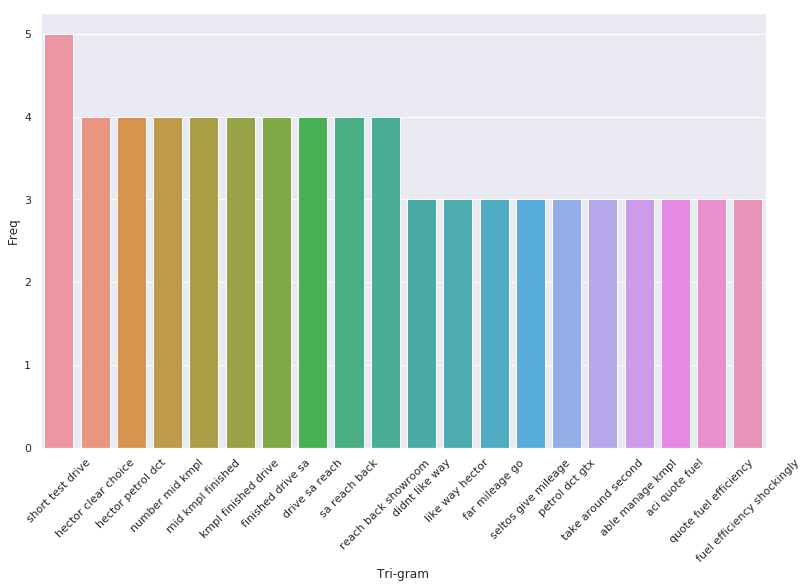

In [0]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

                              n-gram  Freq
0           number mid kmpl finished     4
1            mid kmpl finished drive     4
2             kmpl finished drive sa     4
3            finished drive sa reach     4
4                drive sa reach back     4
5             sa reach back showroom     4
6              didnt like way hector     3
7          aci quote fuel efficiency     3
8   quote fuel efficiency shockingly     3
9    fuel efficiency shockingly poor     3
10   efficiency shockingly poor kmpl     3
11         shockingly poor kmpl city     3
12            poor kmpl city highway     3
13          kmpl city highway people     3
14          city highway people went     3
15           highway people went mid     3
16         people went mid displayed     3
17          went mid displayed value     3
18         mid displayed value start     3
19        displayed value start kmpl     3


[Text(0, 0, 'number mid kmpl finished'),
 Text(0, 0, 'mid kmpl finished drive'),
 Text(0, 0, 'kmpl finished drive sa'),
 Text(0, 0, 'finished drive sa reach'),
 Text(0, 0, 'drive sa reach back'),
 Text(0, 0, 'sa reach back showroom'),
 Text(0, 0, 'didnt like way hector'),
 Text(0, 0, 'aci quote fuel efficiency'),
 Text(0, 0, 'quote fuel efficiency shockingly'),
 Text(0, 0, 'fuel efficiency shockingly poor'),
 Text(0, 0, 'efficiency shockingly poor kmpl'),
 Text(0, 0, 'shockingly poor kmpl city'),
 Text(0, 0, 'poor kmpl city highway'),
 Text(0, 0, 'kmpl city highway people'),
 Text(0, 0, 'city highway people went'),
 Text(0, 0, 'highway people went mid'),
 Text(0, 0, 'people went mid displayed'),
 Text(0, 0, 'went mid displayed value'),
 Text(0, 0, 'mid displayed value start'),
 Text(0, 0, 'displayed value start kmpl')]

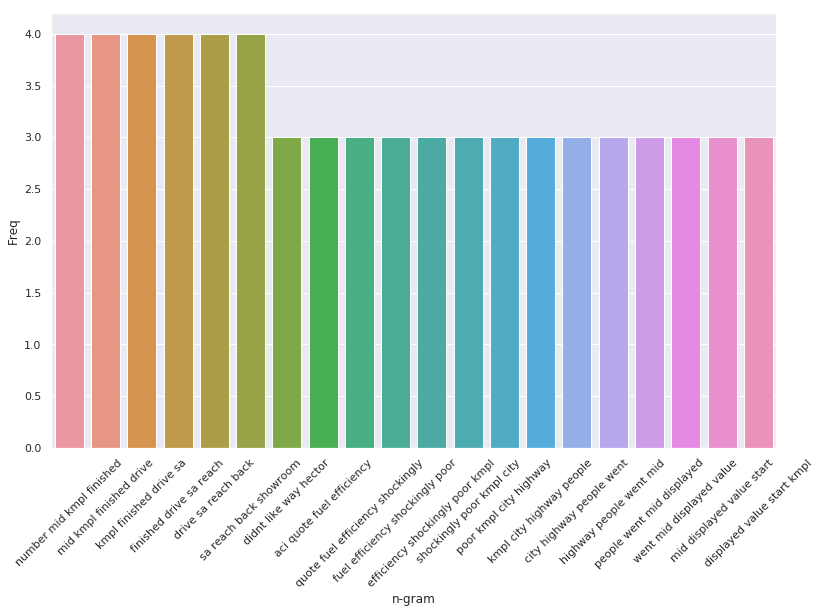

In [0]:
#Most frequently occuring Tri-grams
def get_top_n4_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(4,4), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top4_words = get_top_n4_words(corpus, n=20)
top4_df = pd.DataFrame(top4_words)
top4_df.columns=["n-gram", "Freq"]
print(top4_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="n-gram", y="Freq", data=top4_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# NGram Findings

As we can above graphical representations one things we can identify the most of the customer comments are about milege, fuel efficiency and kmpl.

The most of the customer reviews tells about fuel efficiency is poor in city drive.

In [72]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=b5d6e2e4eb0e2a76d900f1569aa166d6bc2646f0e38af08cc629056fb6005085
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


# Topic Modeling

In [0]:
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# Creating each tokens
tokenized_reviews = pd.Series(corpus).apply(lambda x: x.split())
print(tokenized_reviews[1])

['like', 'hearing', 'imo', 'mg', 'getting', 'right', 'suv', 'hottest', 'body', 'type', 'check', 'cross', 'shape', 'diesel', 'auto', 'check', 'fiat', 'diesel', 'foreign', 'connection', 'check', 'british', 'audi', 'like', 'indicator', 'tesla', 'like', 'touchscreen', 'huge', 'sunroof', 'bragging', 'check', 'biggest', 'country', 'killer', 'price', 'wip', 'speculation', 'medium', 'sure', 'turn', 'aspirational', 'product', 'pricewise', 'land', 'directly', 'harrier', 'territory', 'undercutting', 'steal', 'lot', 'customer', 'tata', 'ofcourse', 'get', 'quality', 'sale', 'service', 'network', 'right', 'shape', 'happen', 'medium', 'review', 'initial', 'ownership', 'review', 'decide', 'fate', 'company']


In [0]:
# creating dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

In [0]:
# creating document matrix for each tokens
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [82]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=100,
                chunksize=1000, passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [84]:
# Important words in each topic
lda_model.print_topics()

[(0,
  '0.011*"kmpl" + 0.008*"km" + 0.008*"mileage" + 0.008*"number" + 0.008*"drive" + 0.007*"fuel" + 0.006*"highway" + 0.006*"city" + 0.006*"mid" + 0.005*"auto"'),
 (1,
  '0.011*"mg" + 0.009*"kmpl" + 0.009*"kia" + 0.007*"dct" + 0.007*"like" + 0.007*"km" + 0.006*"diesel" + 0.006*"hector" + 0.006*"petrol" + 0.006*"b"'),
 (2,
  '0.022*"hector" + 0.011*"seltos" + 0.009*"kia" + 0.008*"dct" + 0.008*"petrol" + 0.006*"road" + 0.006*"like" + 0.006*"good" + 0.006*"drive" + 0.005*"seat"')]

In [85]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.026133 -0.081115       1        1  34.940567
2     -0.079170  0.057794       2        1  34.720848
0      0.105303  0.023321       3        1  30.338585, topic_info=     Category       Freq        Term      Total  loglift  logprob
26    Default  70.000000      hector  70.000000  30.0000  30.0000
418   Default  41.000000         kia  41.000000  29.0000  29.0000
1474  Default  15.000000        fuel  15.000000  28.0000  28.0000
420   Default  45.000000        kmpl  45.000000  27.0000  27.0000
520   Default  36.000000      seltos  36.000000  26.0000  26.0000
463   Default  22.000000      number  22.000000  25.0000  25.0000
1244  Default  10.000000       short  10.000000  24.0000  24.0000
402   Default  17.000000     highway  17.000000  23.0000  23.0000
290   Default  16.000000           b  16.000000  22.0000  22.0000
639   Default   9.000000        dont   9.000000  21.0000  21.0000
233   Default  15.000000        city  15.000000  20.0000  20.0000
200   Default  15.000000         mid  15.000000  19.0000  19.0000
833   Default  14.000000           l  14.000000  18.0000  18.0000
1646  Default   6.000000        kmph   6.000000  17.0000  17.0000
1679  Default   6.000000    assuming   6.000000  16.0000  16.0000
890   Default   6.000000         aci   6.000000  15.0000  15.0000
67    Default   7.000000       wheel   7.000000  14.0000  14.0000
1452  Default   8.000000        gear   8.000000  13.0000  13.0000
158   Default  14.000000        rear  14.000000  12.0000  12.0000
270   Default  16.000000     traffic  16.000000  11.0000  11.0000
39    Default  43.000000          mg  43.000000  10.0000  10.0000
1709  Default  13.000000      return  13.000000   9.0000   9.0000
637   Default   9.000000      doesnt   9.000000   8.0000   8.0000
250   Default  36.000000          km  36.000000   7.0000   7.0000
113   Default  13.000000         suv  13.000000   6.0000   6.0000
1700  Default   6.000000       error   6.000000   5.0000   5.0000
170   Default  13.000000       start  13.000000   4.0000   4.0000
210   Default  15.000000      really  15.000000   3.0000   3.0000
1045  Default  11.000000  efficiency  11.000000   2.0000   2.0000
291   Default  14.000000        back  14.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
402    Topic3  13.061643     highway  17.460178   0.9025  -5.0470
463    Topic3  16.041218      number  22.029697   0.8755  -4.8415
1654   Topic3   4.779438       reach   6.065478   0.9545  -6.0523
233    Topic3  11.567078        city  15.961644   0.8707  -5.1685
200    Topic3  11.544804         mid  15.959734   0.8689  -5.1704
1181   Topic3   4.726162          th   6.064973   0.9433  -6.0636
1045   Topic3   8.284238  efficiency  11.398255   0.8736  -5.5023
506    Topic3   7.769683          sa  10.637362   0.8786  -5.5664
291    Topic3   9.673720        back  14.468614   0.7902  -5.3473
170    Topic3   9.061477       start  13.707421   0.7788  -5.4126
833    Topic3   9.234477           l  14.478745   0.7430  -5.3937
420    Topic3  22.092537        kmpl  45.280209   0.4751  -4.5214
5      Topic3  10.509759        auto  17.568474   0.6789  -5.2644
320    Topic3   7.769428     command  12.195656   0.7419  -5.5665
580    Topic3   7.383053        week  11.434092   0.7553  -5.6175
250    Topic3  16.644821          km  36.883633   0.3971  -4.8046
448    Topic3  16.241919     mileage  36.103477   0.3940  -4.8291
239    Topic3  15.978634       drive  41.580784   0.2364  -4.8454
113    Topic3   7.721924         suv  13.774954   0.6140  -5.5726
124    Topic3   6.939407     already  12.238258   0.6254  -5.6794
474    Topic3   7.780155      people  15.319975   0.5152  -5.5651
17     Topic3   8.072187      engine  16.867167   0.4558  -5.5282
363    Topic3   8.883904        even  21.538914   0.3071  -5.4324
22     Topic3   8.957027         get  23.872936   0.2124 

# Topic Identification

Here we tried to 3 main topic from the customer reviews

1)

# Building Sentiment Classifier

In [0]:
from sklearn.model_selection import train_test_split

# Sepearating Review and Sentiment from the comments

In [0]:
X = data['Reviews']
y = data['Sentiment']

# Train and Test Split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Importing Pipeline object and SVM classifier 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [0]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())])

# Fit the Model

In [0]:
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)

# Accuracy of the Model

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.60      0.75      0.67         4
     Neutral       0.75      0.67      0.71         9
    Positive       0.60      0.60      0.60         5

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.66        18
weighted avg       0.68      0.67      0.67        18



In [69]:
print("Accuracy of the classification model is",accuracy_score(y_test,predictions))

Accuracy of the classification model is 0.6666666666666666
